## Testing "link_extractor"

In [48]:
from link_extractor import Google

In [49]:
search = Google(company="UBS")
links = search.get_links(max_pages=None)

In [50]:
links["Link"].head()

0    https://finance.yahoo.com/news/ubs-credit-suis...
1    https://apnews.com/article/credit-suisse-ubs-t...
2    https://seekingalpha.com/news/3953847-ubs-cred...
3    https://www.google.com/search?q=UBS&hl=en&sour...
4    https://finance.yahoo.com/news/tesla-manufactu...
Name: Link, dtype: object

In [51]:
urls = links["Link"].to_list()

## Testing "html_content_extractor2"

In [52]:
from content_extractor2 import get_content

In [53]:
results = get_content(urls)

Getting news article info: 100%|██████████| 303/303 [13:53<00:00,  2.75s/it]

The following news sources could not be accessed or resulted in an error:
https://www.investing.com/news/stock-market-news/apple-iphone-sellthrough-down-just-3-yoy-as-us-growth-turned-claims-ubs-432SI-3047723 

https://www.nytimes.com/2023/03/29/business/dealbook/ubs-ceo-ermotti.html 

https://www.investing.com/news/stock-market-news/ubs-shares-dip-amid-reports-of-job-cuts-credit-suisse-deal-probe-3047352 

https://www.nytimes.com/2023/03/29/business/dealbook/ubs-credit-suisse-sergio-ermotti.html 

https://www.bloomberg.com/opinion/articles/2023-03-29/ubs-needs-the-heft-that-sergio-ermotti-brings-to-credit-suisse-deal 

https://www.funds-europe.com/news/ubscredit-suisse-deal-under-investigation 

https://www.investing.com/news/stock-market-news/up-to-30-of-jobs-to-be-cut-by-enlarged-ubs-tagesanzeiger-reports-3047068 

https://www.thestreet.com/investing/stocks/stocks-firmly-higher-ubs-micron-jamie-dimon-lululemon 

https://www.nytimes.com/2023/03/19/business/ubs-credit-suisse.html 

ht

In [54]:
results.head(10)

,Link,Title,Body,Author,Published
0,https://finance.yahoo.com/news/ubs-credit-suis...,UBS and Credit Suisse shares drop as Swiss pro...,A logo of Swiss bank UBS is seen in Zurich\n\n...,[Joice Alves],None
1,https://apnews.com/article/credit-suisse-ubs-t...,Swiss prosecutors probe Credit Suisse ahead of...,FILE - A clock next to a logo of the Swiss ban...,[],2023-04-03 09:17:39+00:00
2,https://seekingalpha.com/news/3953847-ubs-cred...,"UBS, Credit Suisse shares drop after Swiss pro...",UBS Group (NYSE:UBS) ordinary shares slid 3.1%...,"[Liz Kiesche, Sa News Editor]",2023-04-03 13:58:20-04:00
3,https://www.google.com/search?q=UBS&hl=en&sour...,Google Search,The Swiss attorney general's office says it ha...,[],None
4,https://finance.yahoo.com/news/tesla-manufactu...,"Tesla Manufactured 4,000 Model Ys In One Week,...","Philipp Rickenbacher, the chief executive of S...",[Vandana Singh],None
5,https://www.reuters.com/business/finance/swiss...,"Swiss sight deposits fall, suggesting Credit S...","\n\n\n\n\n\n\n\n\n\n\n\n\n\nZURICH, April 3 (R...",[John Revill],2023-04-03 00:00:00
6,https://www.finews.com/news/english-news/56619...,Management Consultant Orbit36 Enlists Former U...,Management consulting boutique Orbit36 special...,[],2023-04-03 08:55:05
7,https://www.gzeromedia.com/what-were-watching-...,What We’re Watching: Russia hits eastern Ukrai...,We have updated our Privacy Policy and Terms o...,[Gabrielle Debinski],2023-04-02 19:56:08+00:00
8,https://m.timesofindia.com/business/india-busi...,Credit Suisse: UBS-Credit Suisse merger: Some ...,BENGALURU: Indian IT firms are said to have ar...,[],None
9,https://fortune.com/2023/04/02/ubs-cut-workfor...,UBS to cut workforce by up to 30% after Credit...,UBS Group AG will cut its workforce by between...,[Bastian Benrath Bloomberg],2023-04-02 00:00:00


## Some NLP Preprocessing

In [115]:
len(results)

284

In [116]:
data = results.loc[results["Body"].str.strip().astype(bool)].reset_index(drop=True)

In [117]:
len(data)

272

In [118]:
data.head()

,Link,Title,Body,Author,Published
0,https://finance.yahoo.com/news/ubs-credit-suis...,UBS and Credit Suisse shares drop as Swiss pro...,A logo of Swiss bank UBS is seen in Zurich\n\n...,[Joice Alves],None
1,https://apnews.com/article/credit-suisse-ubs-t...,Swiss prosecutors probe Credit Suisse ahead of...,FILE - A clock next to a logo of the Swiss ban...,[],2023-04-03 09:17:39+00:00
2,https://seekingalpha.com/news/3953847-ubs-cred...,"UBS, Credit Suisse shares drop after Swiss pro...",UBS Group (NYSE:UBS) ordinary shares slid 3.1%...,"[Liz Kiesche, Sa News Editor]",2023-04-03 13:58:20-04:00
3,https://www.google.com/search?q=UBS&hl=en&sour...,Google Search,The Swiss attorney general's office says it ha...,[],None
4,https://finance.yahoo.com/news/tesla-manufactu...,"Tesla Manufactured 4,000 Model Ys In One Week,...","Philipp Rickenbacher, the chief executive of S...",[Vandana Singh],None


In [119]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

import string
import nltk
# Import the stop word list
from nltk.corpus import stopwords
nltk.download("stopwords")
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Import stemmer.
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [120]:
# Average Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).mean()

391.6102941176471

In [121]:
# Total Wordcount after pre-processing
data["Body"].apply(lambda x: len(x.split())).sum()

106518

### Remove Numbers (We are doing reputational NLP so doesnt seem relevant)

In [122]:
def remove_numbers(text):
    no_nums = "".join([i for i in text if not i.isdigit()])
    return no_nums

In [123]:
data["Body"] = data["Body"].apply(lambda x: remove_numbers(x))
data["Body"].head(10)

0    A logo of Swiss bank UBS is seen in Zurich\n\n...
1    FILE - A clock next to a logo of the Swiss ban...
2    UBS Group (NYSE:UBS) ordinary shares slid .% i...
3    The Swiss attorney general's office says it ha...
4    Philipp Rickenbacher, the chief executive of S...
5    \n\n\n\n\n\n\n\n\n\n\n\n\n\nZURICH, April  (Re...
6    Management consulting boutique Orbit specializ...
7    We have updated our Privacy Policy and Terms o...
8    BENGALURU: Indian IT firms are said to have ar...
9    UBS Group AG will cut its workforce by between...
Name: Body, dtype: object

### Removing extra whitespaces / new lines

In [124]:
data["Body"] = data["Body"].replace(r'\n'," ", regex=True)

### Removing Punctuation

In [125]:
def remove_punctuation(text):
    no_punct = "".join ([c for c in text if c not in string.punctuation])
    return no_punct

In [126]:
data["Body"] = data["Body"].apply(lambda x: remove_punctuation(x))
data["Body"].head(10)

0    A logo of Swiss bank UBS is seen in Zurich  By...
1    FILE  A clock next to a logo of the Swiss bank...
2    UBS Group NYSEUBS ordinary shares slid  in Mon...
3    The Swiss attorney generals office says it has...
4    Philipp Rickenbacher the chief executive of Sw...
5                  ZURICH April  Reuters  Sight dep...
6    Management consulting boutique Orbit specializ...
7    We have updated our Privacy Policy and Terms o...
8    BENGALURU Indian IT firms are said to have aro...
9    UBS Group AG will cut its workforce by between...
Name: Body, dtype: object

### Tokenization

In [127]:
tokenizer = RegexpTokenizer(r'\w+')

In [128]:
data["Body"] = data["Body"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Body"].head(10)

0    [a, logo, of, swiss, bank, ubs, is, seen, in, ...
1    [file, a, clock, next, to, a, logo, of, the, s...
2    [ubs, group, nyseubs, ordinary, shares, slid, ...
3    [the, swiss, attorney, generals, office, says,...
4    [philipp, rickenbacher, the, chief, executive,...
5    [zurich, april, reuters, sight, deposits, held...
6    [management, consulting, boutique, orbit, spec...
7    [we, have, updated, our, privacy, policy, and,...
8    [bengaluru, indian, it, firms, are, said, to, ...
9    [ubs, group, ag, will, cut, its, workforce, by...
Name: Body, dtype: object

### Removing Stopwords

In [129]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words("english")]
    return words

In [130]:
data["Body"] = data["Body"].apply(lambda x: remove_stopwords(x))
data["Body"].head(10)

0    [logo, swiss, bank, ubs, seen, zurich, joice, ...
1    [file, clock, next, logo, swiss, bank, credit,...
2    [ubs, group, nyseubs, ordinary, shares, slid, ...
3    [swiss, attorney, generals, office, says, open...
4    [philipp, rickenbacher, chief, executive, swis...
5    [zurich, april, reuters, sight, deposits, held...
6    [management, consulting, boutique, orbit, spec...
7    [updated, privacy, policy, terms, use, eurasia...
8    [bengaluru, indian, firms, said, around, milli...
9    [ubs, group, ag, cut, workforce, completing, t...
Name: Body, dtype: object

### Lemmatization

In [131]:
lemmatizer = WordNetLemmatizer()

In [132]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize (i) for i in text]
    return lem_text

In [133]:
data["Body"] = data["Body"].apply(lambda x: word_lemmatizer(x))
data["Body"].head(10)

0    [logo, swiss, bank, ubs, seen, zurich, joice, ...
1    [file, clock, next, logo, swiss, bank, credit,...
2    [ubs, group, nyseubs, ordinary, share, slid, m...
3    [swiss, attorney, general, office, say, opened...
4    [philipp, rickenbacher, chief, executive, swis...
5    [zurich, april, reuters, sight, deposit, held,...
6    [management, consulting, boutique, orbit, spec...
7    [updated, privacy, policy, term, use, eurasia,...
8    [bengaluru, indian, firm, said, around, millio...
9    [ubs, group, ag, cut, workforce, completing, t...
Name: Body, dtype: object

In [134]:
# Average Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).mean()

230.19485294117646

In [135]:
# Total Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).sum()

62613

### Encoding

In [136]:
text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

In [137]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 abcdefghijklmnopqrstuvwxyzâäéíñöü
34


In [138]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate (chars) }
itos = { i:ch for i,ch in enumerate (chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''. join ( [itos [i] for i in l]) # decoder: take a list of integers, output a string
print (encode("hii there"))
print (decode(encode("hii there")))

[8, 9, 9, 0, 20, 8, 5, 18, 5]
hii there


### Wordcloud - Test

In [139]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

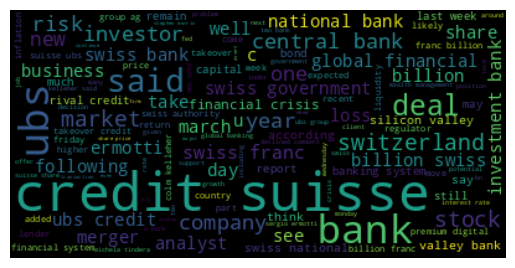

In [140]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud on Titles only

In [141]:
data["Title"] = data["Title"].apply(lambda x: remove_numbers(x))
data["Title"] = data["Title"].replace(r'\n'," ", regex=True)
data["Title"] = data["Title"].apply(lambda x: remove_punctuation(x))
data["Title"] = data["Title"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Title"] = data["Title"].apply(lambda x: remove_stopwords(x))
data["Title"] = data["Title"].apply(lambda x: word_lemmatizer(x))

In [142]:
title_text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

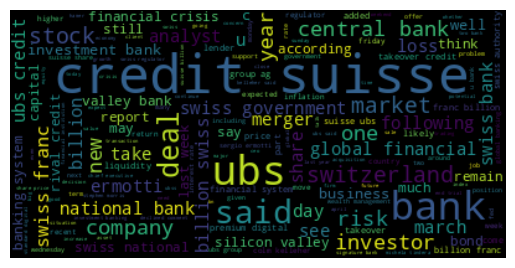

In [143]:
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(title_text)

# Display the generated image:
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()